<a href="https://colab.research.google.com/github/timsetsfire/m4ml/blob/main/Vector_Calculus_(M4ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vector Calculus

It is expected that you completed the Linear Algebra M4ML Notebook prior to this.  

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from sklearn.datasets import make_circles, load_diabetes
from sklearn.model_selection import train_test_split
## useful function from statsmodels
import statsmodels.api as sma
## add_constant will check the rank of your matrix prior to adding a column on 1s.

In [3]:
lin_reg_data = load_diabetes(return_X_y = False)

In [4]:
X = DataFrame(lin_reg_data.data, columns=lin_reg_data.feature_names)
y = DataFrame(lin_reg_data.target, columns = ["target"])
tdf = y.join(X, how="inner")

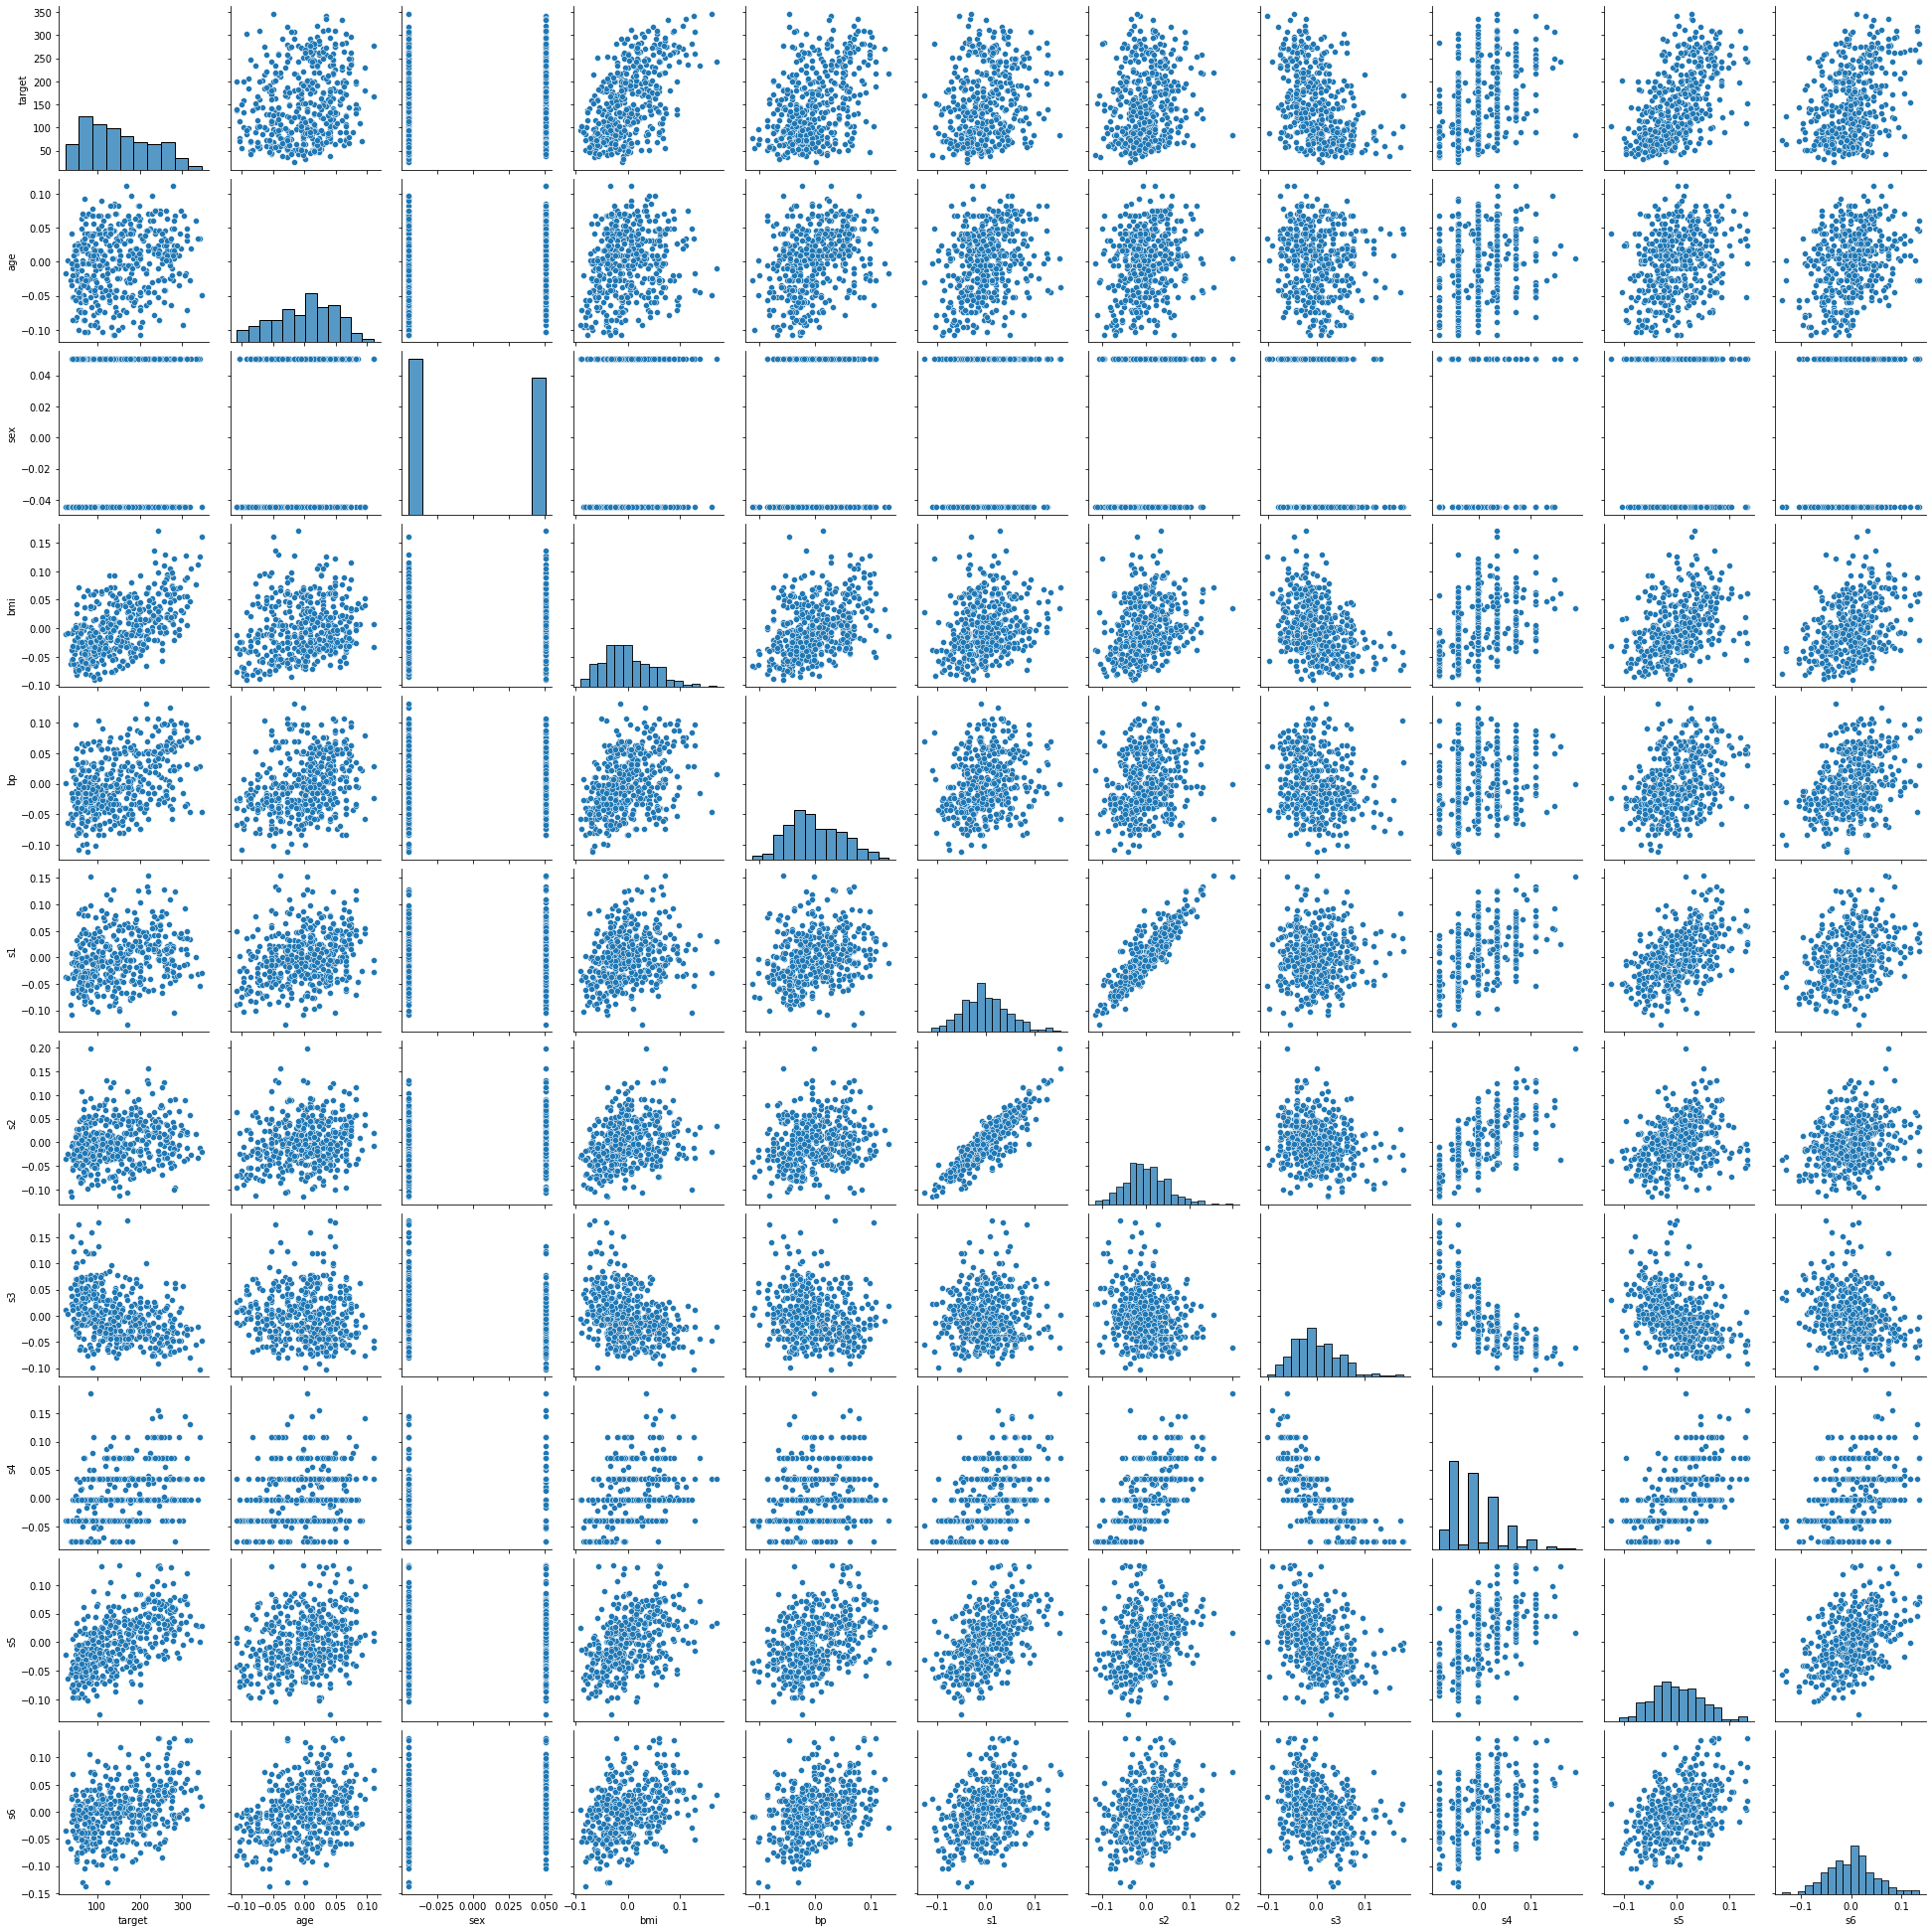

In [17]:
sns.pairplot(tdf)

In [6]:
X = np.matrix(X)
y = np.matrix(y)

In [7]:
tdf.head()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
tdf.describe()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,152.133484,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,77.093005,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,25.000000,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,87.000000,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,140.500000,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,211.500000,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,346.000000,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


## Recall Regression

Regression attempts to model the relationship between some dependent variable (target, endogenous variable) and a set of independent variables (features, exogenous variables).  We will assume that the expected value of the target variable (mean)  is related in some way (via hypothesis) to a linear combination of features.  This is a __generalized linear model__.  

Examples of generalized linear models
* Linear regression - the hypothesis is the identify function explains the mean
* Poisson model - the hypothesis can be the exponential function 
* Logistic regression - the hypothesis is the sigmoid function.  We'll see this function later
* Multinomial Logistic regression - the hypothesis is the softmax function (to be seen in neural nets from scratch)

## Recall Fitting the regression with the normal equations

Fitting a linear regression is a fairly simply procedure, but can be prove difficult if there are a significant number of observations, or if there are more features than observations.  

We hypothesize that our target variable $y$ can be written as a linear combination of features $X_1, X_2, \ldots, X_n$, i.e., 

$$y = a + b_1X_1 + b_2X_2 + \cdots + b_nX_n + \epsilon$$

Above, $\epsilon$ is the error.  We can write this succinctly in matrix form as 

$$y = X\beta + \epsilon$$

One way to solve this problem is directly via  

$$ \beta^* = (X^TX)^{-1}X^Ty $$

In [9]:
# add bias into X
X = sma.add_constant(X)
parameters = ["bias"]
parameters.extend( ["x{}".format(i) for i in range(10)])
## solution to the least squares problem
beta_normal_eq = np.linalg.inv(X.T*X)*X.T*y
print( DataFrame(beta_normal_eq, index=parameters, columns=["parameters"]))

      parameters
bias  152.133484
x0    -10.012198
x1   -239.819089
x2    519.839787
x3    324.390428
x4   -792.184162
x5    476.745838
x6    101.044570
x7    177.064176
x8    751.279321
x9     67.625386


## Moving towards optimization

If we have a nice closed form solution, who cares about optimization?  

Linear regression is fairly simple to solve (as shown above).  The least squares cost function lends itself to a nice closed form solution (exact), but sometimes (with other cost functions) that is not always the case and we  we must settle for a numerical (approximate) solutions.  

Additionally, the least squares solution is very easy to calculate when the number of features and observations are reasonalbe, but sometimes that is not the case.  Suppose that our feature matrix $X$ is $m \times n$, i.e, $m$ rows and $n$ features.  Solving the linear regression would require several steps of varying [complexity](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra) 

### Cost function

For optimization, we have to have some kind of cost or loss function we want to optimize.  When we set up a regression problem, our main objective was to minimize the sum of squared errors.  Thinking about this as an optimization problem, we can use vector calc to solve.  

Starting with 

$$C(\beta) = \frac{1}{N}\sum_{i=1}^N (y_i - X_i\beta)^2$$

or, equivalently 

$$C(\beta) = \frac{1}{N} (y - X\beta)^T(y - X\beta)$$.  

### Global vs Local Optimum

If $f$ is a function and $x$ a point in the domain of $f$ such that $f(x) \le f(y)$ for all other $y$ in the domain of $f$.  Then we say that $x$ is a global optimum.  

On the other hand, given an $x$ in the domain of $f$ and if there exists open interval containing $x$ such that $f(x) \le f(y)$ for all $y$ in the open interval then we say that $x$ is a local optimum.  

In the least square (our linear regression) optimization problem we found the global solution.  We are certain that it is global because the least square problem is a convex optimization problem.  

Convex optimization problems are special - if a local optimium exists, then it must be a global optimum.  

## Gradient Descent

Gradient descent is a first order optimization method, that is, it only uses first derivatives to solve the optimization problem (i.e., find a local extremum).  

This method is so great because 

* you don't need to work about the hessian of the objective function (the matrix of partial derivatives).  Consider Newton Rhapson (another optimization routine) method which requires calculating the hessian and then inverting it.  If there are $p$ parameters to solve for, the Hessian will be $p \times p$.  This can be very expensive for large problems!! 
* it is very easy to implement
* it is embarrasingly parrallelizable
* its extension, Stochastic Gradient Descent is very popular in training neural nets.  

If we focus on the original cost function, and calculate the gradient with respect to $\beta$ and apply gradient descent, we get the following.

$$\nabla C(\beta) = \frac{-1}{N} X^T (y - X\beta)$$

So then our update equation becomes 

$$\beta \leftarrow \beta - \eta \nabla C(\beta)$$

Our update equation is ready to go, the only thing we need to figure out is when to stop the update.  Thinking through this, our schema is working to find the $\beta$ which has a gradient of 0.  So we could stop when the gradient becomes is very close to zero in norm.  

## Linear Regression via Gradient Descent

For this problem, we will use 

In [10]:
## create the objective function 

class MSE(object):
    def valueAt( x, y, beta):
        yhat = x * b
        e = y - yhat
        return y.T*y / x.shape[0]
    def gradientAt(x, y, beta):
        yhat = x * beta
        e = y - yhat
        return -x.T*e / x.shape[0]
  
class L2(object):
    def valueAt(b):
        return 1/2*linalg.norm(b) 
    def gradientAt(b):
        return b
    
class GradientDescent(object):
    def __init__(self, cost_function=MSE, tolerance=1e-6, regularization=None):
        self.cost_function = cost_function
        self.tol = tolerance
        self.iter = 0
        self.beta = None
        self.regularization = regularization
        
    def optimize(self, X,y,learning_rate=0.1,init_params=None):
        if init_params is None:
            beta = np.matrix( np.zeros(X.shape[1])).T
        else:
            beta = init_params
        grad = self.cost_function.gradientAt(X,y,beta)
        if self.regularization is not None:
            pass
        prev_beta = beta
        beta = beta - learning_rate*grad
        ## several termination criteria to use
        ## abs change in beta is small
        ## abs change in beta / norm of beta 
        ## abs change in object is small
        ## here we use magitute of the gradient
        while np.linalg.norm(prev_beta - beta)/np.linalg.norm(beta) > self.tol:
            prev_beta = beta
            self.iter += 1
            grad = self.cost_function.gradientAt(X,y,beta)
            if self.regularization is not None:
                pass
            beta = beta - learning_rate*grad
        self.beta = beta
        return beta

In [11]:
linear_regression = GradientDescent()

sbeta_gd = linear_regression.optimize(X,y,learning_rate=0.01)
DataFrame( np.concatenate( (beta_normal_eq, sbeta_gd),axis=1),
          index = parameters,
          columns = ["ols beta", "gd beta"])

,ols beta,gd beta
bias,152.133484,152.133484
x0,-10.012198,-1.574394
x1,-239.819089,-222.312609
x2,519.839787,512.439136
x3,324.390428,314.057184
x4,-792.184162,-52.584830
x5,476.745838,-116.508402
x6,101.044570,-208.316116
x7,177.064176,122.903392
x8,751.279321,435.103360


Not bad, not great.  There is an art to choosing your learning rate.  Also, scale of the data can impact your solution.  

One thing to be aware of is that Gradient Descent is sensitive to scale of the data.  It is usually best to normalize the data to mean zero and unit variance.


In [12]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X[:,1:])  ## returns a ndarray, not a matrix :( 
y = standardScaler.fit_transform(y)

In [13]:
X = np.matrix(X)
y = np.matrix(y)

In [14]:
sbeta_gd = linear_regression.optimize(X,y,learning_rate=0.1)
DataFrame( np.concatenate( (np.linalg.pinv(X)*y, sbeta_gd),axis=1),
          index = lin_reg_data.feature_names,
          columns = ["ols beta", "gd beta"])

,ols beta,gd beta
age,-0.006184,-0.006181
sex,-0.148132,-0.148129
bmi,0.321096,0.321104
bp,0.200370,0.200367
s1,-0.489319,-0.488615
s2,0.294478,0.293919
s3,0.062414,0.062099
s4,0.109370,0.109280
s5,0.464053,0.463790
s6,0.041771,0.041774


A typical measure for assessing goodness of fit with a linear model is to calculate the $R^2$ statistic.  You can think of this as the lift provided by the model over no model (just use the average of $y$ as the prediction)

In [15]:
## r^2
def r2(x,y,beta):
    yhat = x*beta
    e = y - yhat
    ess = (e.T*e)[0,0]
    tss = ((y - y.mean()).T*(y - y.mean()))[0,0]
    return 1 - ess/tss

print(r2(X,y,sbeta_gd))

0.5177494169862471


# Advanced Topic: Regularization 

Problems we can run into when estimating a regression
1.  The model "memorizes" the data.  This is called overfitting
2.  There are more variables than observations (no solution to the least squares problem)
3.  Highly correlated features (unstable solution).

The second two problems affect the stability of the estimates, the first is indicative when the model doesn't generalize.  

We typically assume that there are more rows than columns or that correlation among columns is small (in the absolute sense), but there will be instances where there are (many) more columns than rows, or variables that have correlation close to 1.  When this happens, the covariance matrix is singular or nearly singular.    

One popular method to handle these problems is via ridge regression.  This method shrinks the coefficients of the regression towards zero and in the event of highly correlation features, the regression coefficients "borrow" from one another.  If you have an issue with the model memorizing the data, this will help the model generalize better.  

Starting with 

$$C(\beta) = \frac{1}{N}\sum_{i=1}^N (y_i - X_i\beta)^2$$

We add some penality, which is a function of $\beta$ as well.  The penalty will be used to keep the model from saturating.  A penalty which lends itself well to this problem is the $L^2$ norm.   

$$C^*(\beta) = \frac{1}{2} C(\beta) + \frac{\lambda}{2} \|\beta\|_2^2$$

Using only linear algebrq there is a closed form solution to this problem is given by the normal equations to the above cost function

$$\hat{\beta} = (x^Tx + \lambda I)^{-1} x^Ty$$

Basically, we add a small amount to the diagonal of covariance matrix of $x$ to insure invertibility so that the solution exists.  

Above, we just introduced the notion of regularization.  We added a penalty to the optimization problem, and now the solution offers a trade off between fit and its norm.  This can help with overfitting and stability of the model with highly correlated predictors and when the number of features is large.  This regularization is easily implemented when learning neural networks, and that is why we introduce it here.  

Important note - we do NOT want to regularize the bias.

Using calculus to solve, we must calc the gradient of our new cost function.  

$$\nabla C^*(\beta) = \nabla C(\beta) + \lambda \beta $$

## Exercise 1

Your choice of $\lambda$ can be whatever.  The larger $\lambda$ is the closer to 0 the solution will be.  

Solve the the regularization problem via linear algebra

## Exercise 2

Solve the regularization problem via gradient descent.  This would require modifying `class GradientDescent(object)`